# Histogram Equalization without OpenCV

## 사용한 라이브러리

* 이미지 읽기, `matplotlib.image`
* 이미지 출력/그래프 출력, `matplotlib.pyplot`
* 행렬 계산, `numpy`

In [60]:
import matplotlib.image as pim
import matplotlib.pyplot as plt
import numpy as np

## 파일 경로 설정 및 이미지 리드

In [61]:
imgPath = './assets/3_6.jpg'
imgOrigin = pim.imread(imgPath)

## 히스토 그램 계산

In [62]:
hist, bins = np.histogram(imgOrigin.flatten(), 256, [0, 256])

## 누적 히스토 그램 계산

numpy의 cumsum 함수를 사용하여, 누적 함수 계산

In [63]:
cdf = hist.cumsum()

## 마스크 할당

`cdf`의 값이 0인 픽셀은 0을 유지하기 위해, 마스크를 만듦

In [64]:
cdf_m = np.ma.masked_equal(cdf, 0)

## Equalization

In [65]:
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max()-cdf_m.min())

## 마스크 처리

`cdf_m`을 이용해 마스크를 적용해, 다시 0으로 변환함

In [66]:
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

## 출력

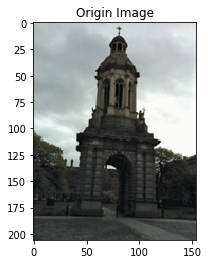

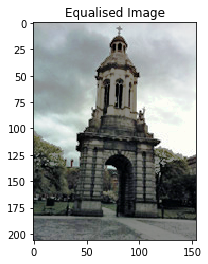

In [67]:
imgEq = cdf[imgOrigin]
plt.imshow(imgOrigin, 'gray'), plt.title('Origin Image')
plt.show()
plt.imshow(imgEq, 'gray'), plt.title('Equalised Image')
plt.show()

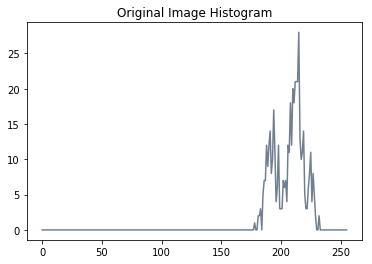

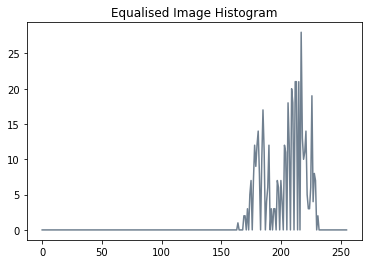

In [68]:
hist, bin = np.histogram(imgOrigin[3].flatten(), 256, [0, 256])
plt.plot(hist, color='slategrey'), plt.title('Original Image Histogram')
plt.show()
hist, bin = np.histogram(imgEq[3].flatten(), 256, [0, 256])
plt.plot(hist, color='slategrey'), plt.title('Equalised Image Histogram')
plt.show()